In [23]:
#manipulação e tratamento
import pandas as pd
import numpy as np
from google.colab import files

#plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

#modelos de treinamento e algoritmos
from sklearn.ensemble import RandomForestClassifier

#métricas de sucesso dos modelos
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

#processamento dos modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
#subindo o arquivo através de um facility do google colab
uploaded = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [7]:
#criando o data frame principal
nome_do_arquivo = "Dataset.xlsx"
df = pd.read_excel(nome_do_arquivo)

In [8]:
#verificando as informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#indexando o id do df
df.set_index('EmployeeNumber')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [ ]:
#checando os dados estatísticos da base
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470,NaN,NaN,NaN,36.9238,9.13537,18,30,36,43,60
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470,NaN,NaN,NaN,802.486,403.509,102,465,802,1157,1499
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470,NaN,NaN,NaN,9.19252,8.10686,1,2,7,14,29
Education,1470,NaN,NaN,NaN,2.91293,1.02416,1,2,3,4,5
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470,NaN,NaN,NaN,1,0,1,1,1,1,1
EmployeeNumber,1470,NaN,NaN,NaN,1024.87,602.024,1,491.25,1020.5,1555.75,2068


In [9]:
#como a variável a ser medida (Attrition) é categórica, será tratada para poder realizar análises em torno das influências e posteriormente utilizada no modelo
#susbtituindo valores de Yes e No, para 0 e 1
df['Attrition'].replace({"Yes":1,"No":0},inplace=True)

In [10]:
#checando a transformação
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
#verificando correlação da base
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [11]:
#limpando a base de variáveis sem correlação, com um único número e desnecessárias
df.drop(['EmployeeNumber','EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

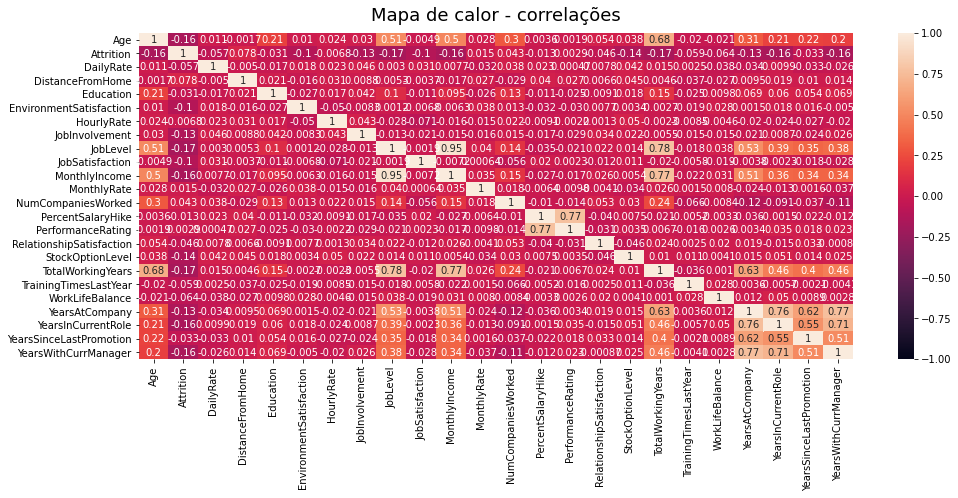

In [12]:
#realizando heatmap de correlações
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Mapa de calor - correlações', fontdict={'fontsize':18}, pad=12);

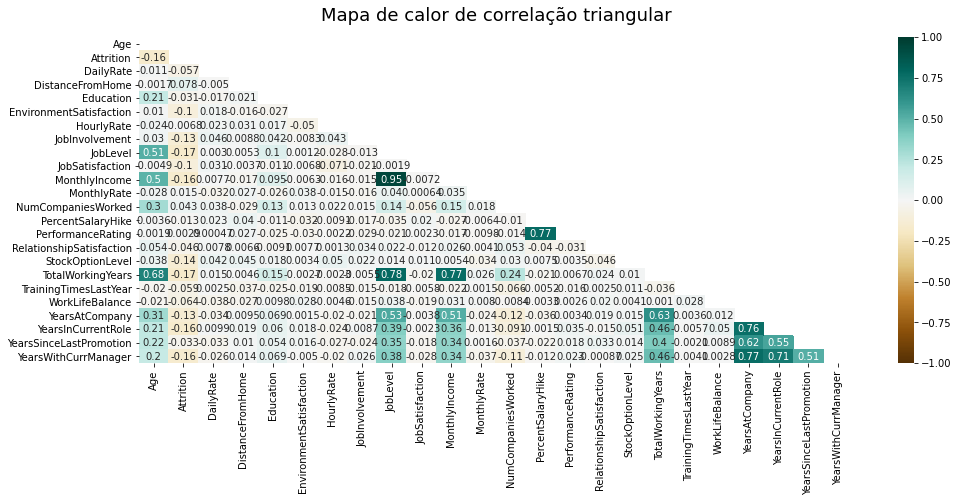

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlação triangular', fontdict={'fontsize':18}, pad=16);

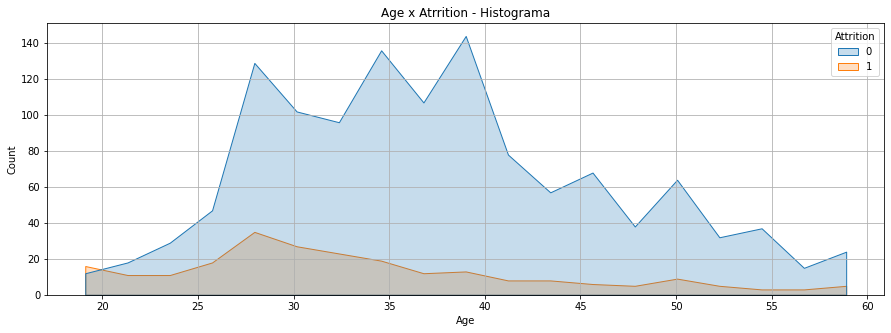

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.histplot(x='Age', hue='Attrition', data=df, element="poly");
plt.title("Age x Atrrition - Histograma")
plt.grid()

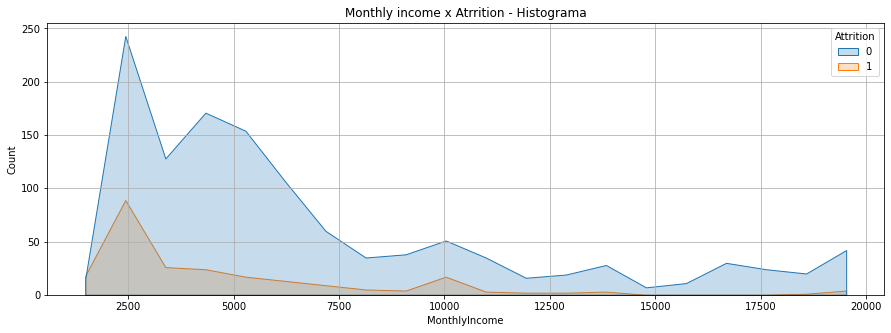

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.histplot(x='MonthlyIncome', hue='Attrition', data=df, element="poly");
plt.title("Monthly income x Atrrition - Histograma")
plt.grid()

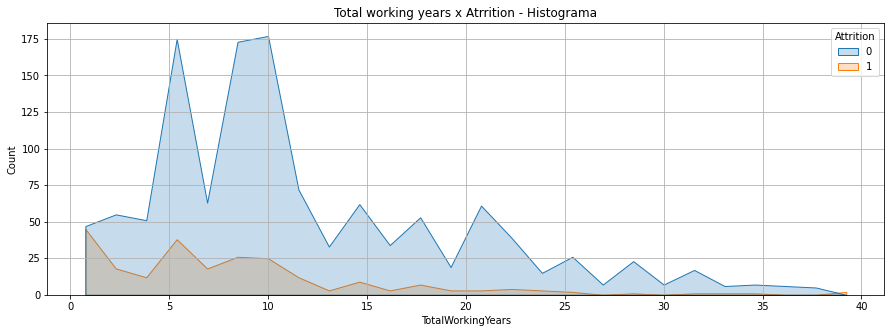

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.histplot(x='TotalWorkingYears', hue='Attrition', data=df, element="poly");
plt.title("Total working years x Atrrition - Histograma")
plt.grid()

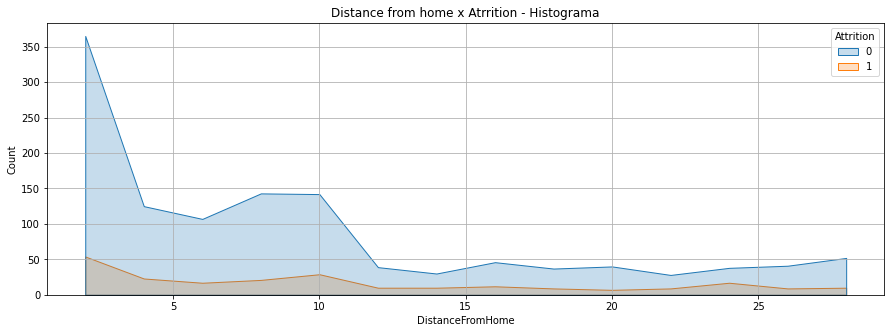

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.histplot(x='DistanceFromHome', hue='Attrition', data=df, element="poly");
plt.title("Distance from home x Atrrition - Histograma")
plt.grid()

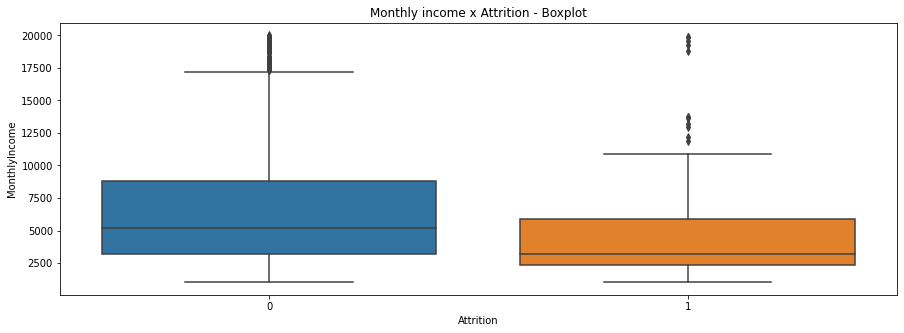

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome', x='Attrition', data=df)
plt.title("Monthly income x Attrition - Boxplot");

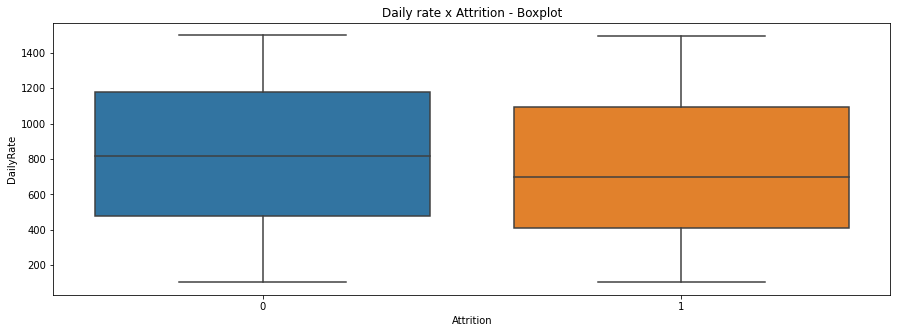

In [ ]:
#realizando o plot de 'Attrition' sobre algumas variáveis correlacionadas
plt.figure(figsize=(15,5))
sns.boxplot(y='DailyRate', x='Attrition', data=df)
plt.title("Daily rate x Attrition - Boxplot");

In [13]:
#criando um novo data frame com as variáveis categóricas
df_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']]
df_cat.head(10)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


In [14]:
#criando um novo data frame com as variáveis numéricas
df_num = df
df_num.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], axis=1, inplace=True)

In [15]:
#usando pandas para substituir todas as variáveis categóricas
df_cat = pd.get_dummies(df_cat)
#criando um novo data frame com as duas bases devidamente tratadas
df_final = pd.concat([df_num, df_cat], axis=1)

In [16]:
#separando a variável a ser medida das explicativas
df_med = df_num['Attrition']
df_final = df_final.drop('Attrition', axis=1)


In [17]:
#separando os dados de treino / teste
x_train,x_test,y_train,y_test = train_test_split(df_final, df_med)

In [18]:
#aplicando o modelo de Floresta aleatória
model_rfc = RandomForestClassifier()

#utilizando a média e o padrão para utilitzar no modelo
model_rfc.fit(x_train, y_train)

#alocando a previsão do modelo
rfc_pred = model_rfc.predict(x_test)

In [19]:
#verificando a acurácia do modelo utilizando o relatório de classficação
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       306
           1       0.68      0.21      0.32        62

    accuracy                           0.85       368
   macro avg       0.77      0.60      0.62       368
weighted avg       0.83      0.85      0.82       368



In [22]:
#contrução da matriz de confusão
matriz_confusao = confusion_matrix(y_test, rfc_pred)
print(matriz_confusao)

[[300   6]
 [ 49  13]]


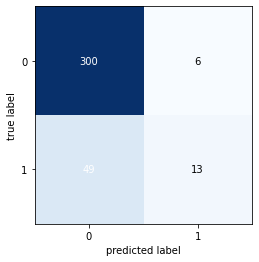

In [24]:
#realiza o plot da matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Text(0.5, 1.0, "Top 5 Fatores importantes para 'Attrition'")

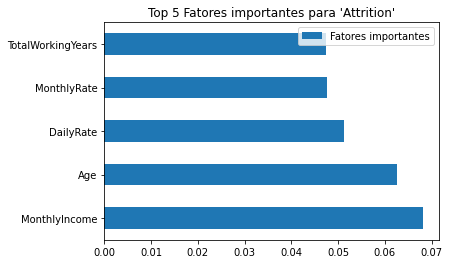

In [20]:
#plotando os resultados da floresta aleatória por importância sobre 'Attrition'
feat = model_rfc.feature_importances_
features = pd.DataFrame(feat, index=df_final.columns, columns=["Fatores importantes"]).sort_values(by='Fatores importantes', ascending=False)
features.head(5).plot(kind='barh')
plt.title("Top 5 Fatores importantes para 'Attrition'")